In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np

from collections import Counter

from time import time

In [3]:
# this function returns the factorial of an integer passed to it
def factorial(n):
    if n<=1:
        return 1
    else:
        return n*factorial(n-1)

<br><br>
<font size=4>
<b>Poisson Distribution:</b>
<br>
Probability distribution that describes the outcome of an independent event that occurs at a known rate ($\lambda$ times over a specified time interval)
<br><br>
<i>
<b>Example:</b>
<br>
Suppose a car-wash has an average of 2 cars come by every 3 minutes, what is the probability that no more than 4 cars will come by in the next 9 minutes ?
</i>
</font>

## Poisson Distribution:
#### Probability distribution that describes the outcome of an independent event that occurs at a known rate ( 𝜆  times over a specified time interval)
####  
## *Example:*
#### *Suppose a car-wash has an average of 2 cars come by every 3 minutes, what is the probability that no more than 4 cars will come by in the next 9 minutes ?*

In [10]:
# 2 cars every 3 minutes is the same rate as 6 cars every 9 minutes (540 seconds)
# Think of each trial as equivalent to 540 distinct and independent events of which, on the average, 6 are successful

startTime = time()

# number of trials
numSamp = 1000

# holds the result of each trial
thisList = []

sampSize = 540 # sample size for each trial (540 seconds)
rate_lambda = 6 # succesful event occurence rate (6 cars every 540 seconds)
sampRange = sampSize+1 # range of randints to sample from (i.e. [1,sampRange])

target_success = 4 # number of successful events we're trying to estimate a probability for (<=4 cars in 9 minutes)

# sample 540 random integers from 1 to 540
# the probability of finding a value less_than_or_equal_to 6 is = "6/540"
for i in range(numSamp):
    aa = np.random.randint(1,sampRange,[sampSize,])
    aa[aa>rate_lambda]=0 # disqualify all randints greater than 6...
    aa[aa!=0] = 1 # and keep only those <= 6...
    thisList.append(sum(aa)) # then append the number of successful outcomes for each trial to the list

endTime = time()

print('Duration:', round(endTime-startTime, 2), 'seconds')
print(thisList)

Duration: 0.16 seconds
[7, 8, 6, 7, 7, 6, 9, 8, 6, 2, 8, 7, 4, 9, 5, 13, 2, 8, 6, 5, 7, 8, 5, 8, 4, 8, 8, 7, 9, 5, 8, 11, 8, 9, 10, 5, 5, 13, 5, 9, 11, 4, 6, 10, 1, 6, 3, 4, 8, 4, 5, 6, 3, 6, 6, 4, 7, 6, 4, 5, 11, 5, 7, 3, 6, 3, 8, 5, 6, 7, 8, 5, 5, 10, 3, 6, 5, 9, 7, 7, 3, 2, 4, 3, 4, 11, 10, 6, 9, 5, 8, 5, 7, 10, 10, 6, 8, 6, 5, 4, 4, 4, 6, 5, 7, 7, 5, 2, 5, 12, 3, 8, 11, 3, 5, 4, 7, 5, 7, 7, 4, 5, 7, 4, 6, 7, 5, 2, 7, 2, 6, 6, 5, 7, 4, 6, 6, 6, 5, 4, 4, 5, 7, 5, 3, 7, 6, 5, 3, 6, 3, 5, 4, 5, 7, 7, 3, 4, 4, 3, 7, 6, 11, 5, 4, 6, 2, 4, 9, 7, 9, 4, 7, 8, 9, 6, 6, 3, 6, 5, 10, 5, 5, 9, 6, 6, 4, 6, 5, 2, 6, 6, 6, 6, 4, 3, 8, 6, 7, 9, 4, 3, 10, 4, 7, 6, 1, 6, 10, 4, 5, 5, 6, 2, 5, 5, 10, 5, 5, 12, 6, 7, 2, 4, 4, 7, 8, 3, 9, 7, 6, 10, 12, 10, 6, 5, 5, 5, 3, 4, 1, 7, 5, 5, 4, 8, 4, 3, 8, 7, 3, 5, 7, 5, 3, 6, 5, 3, 3, 3, 4, 7, 5, 6, 6, 6, 2, 12, 4, 3, 7, 5, 10, 6, 8, 6, 5, 12, 14, 5, 8, 6, 4, 5, 4, 7, 7, 5, 6, 11, 4, 5, 7, 8, 4, 4, 5, 5, 11, 6, 7, 5, 6, 6, 3, 7, 7, 1, 4, 9, 15, 10, 6, 6, 8, 

In [11]:
print('Probability of having no more than 4 cars pass thru in 9 minutes...\n')

bb = np.array(thisList) # convert the list to an array for easy manipulation by Numpy
theProbability = 1.0*sum(bb<=4)/len(bb) # how many of those samples had an outcome <= 4 cars
print('Sampled (' + str(numSamp) + ' samples):', round(theProbability,4))

calcProb = 0
for i in range(target_success+1):
    calcProb += (rate_lambda**i)*np.exp(-rate_lambda)/(factorial(i))
    
print('Theoretical:', round(calcProb,4))

Probability of having no more than 4 cars pass thru in 9 minutes...

Sampled (1000 samples): 0.287
Theoretical: 0.2851


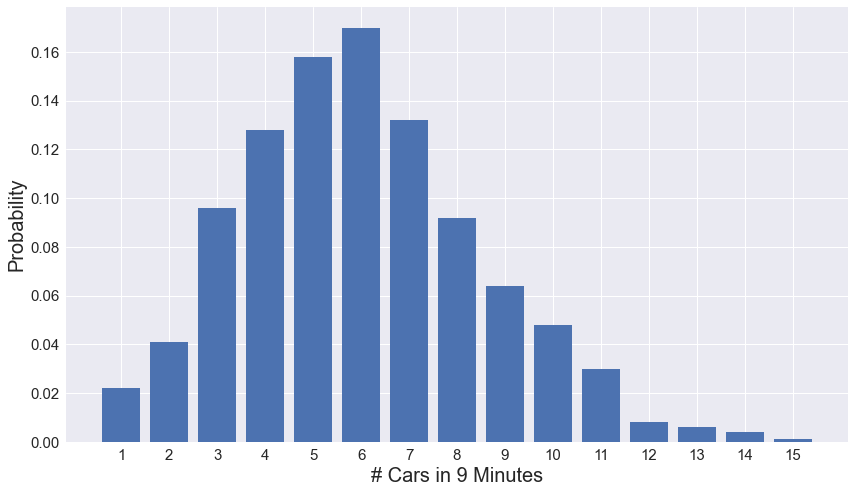

In [12]:
xx = Counter(thisList)

rangeLow = min(xx.keys())
rangeHigh = max(xx.keys())

qx = list(range(rangeLow, rangeHigh+1))
qy = [xx[i]/numSamp if (i in xx.keys()) else 0 for i in qx]

plt.figure(figsize=[14,8])
plt.bar(qx,qy)
plt.xticks(qx, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('# Cars in 9 Minutes', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.show()

In [7]:
for i,j in zip(qx,qy):
    print('Probability of ' + str(i) + ' Cars in 9 minutes:', round(j,6))

Probability of 1 Cars in 9 minutes: 0.1
Probability of 2 Cars in 9 minutes: 0.1
Probability of 3 Cars in 9 minutes: 0.1
Probability of 4 Cars in 9 minutes: 0.1
Probability of 5 Cars in 9 minutes: 0.1
Probability of 6 Cars in 9 minutes: 0
Probability of 7 Cars in 9 minutes: 0.1
Probability of 8 Cars in 9 minutes: 0.1
Probability of 9 Cars in 9 minutes: 0.2
Probability of 10 Cars in 9 minutes: 0.1


In [13]:
print(qx,qy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [0.022, 0.041, 0.096, 0.128, 0.158, 0.17, 0.132, 0.092, 0.064, 0.048, 0.03, 0.008, 0.006, 0.004, 0.001]
